<a href="https://colab.research.google.com/github/keew13/titanic_survivor_ml/blob/master/missing_values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the libraries

In [0]:
import pandas as pd
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical Data Description

In [39]:
train = pd.read_csv("train.csv")
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Count of Missing Values in a DataFrame

In [40]:
count_missing = pd.DataFrame(columns = list(train))
temp = []
for i in range(0, len(list(train))):
  temp.append(train.isnull().values[:, [i]].sum())
count_missing = count_missing.append(pd.Series(temp, index = list(train)), ignore_index = True)
print(count_missing)

  PassengerId Survived Pclass Name Sex  ... Parch Ticket Fare Cabin Embarked
0           0        0      0    0   0  ...     0      0    0   687        2

[1 rows x 12 columns]


# Count of Missing Values

In [41]:
features = list(train)
missing = train.isnull().values[:, :]
for i in range(0, len(features)):
  print(f"Missing Value(s) in {features[i]}: {str(missing[:, [i]].sum())}")

Missing Value(s) in PassengerId: 0
Missing Value(s) in Survived: 0
Missing Value(s) in Pclass: 0
Missing Value(s) in Name: 0
Missing Value(s) in Sex: 0
Missing Value(s) in Age: 177
Missing Value(s) in SibSp: 0
Missing Value(s) in Parch: 0
Missing Value(s) in Ticket: 0
Missing Value(s) in Fare: 0
Missing Value(s) in Cabin: 687
Missing Value(s) in Embarked: 2


# Bar Graph to understand how different sexes affect data

In [43]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


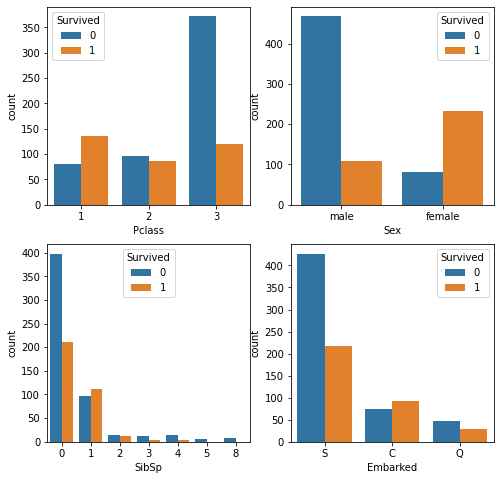

In [65]:
sub_features_comparison = ["Pclass", "Sex", "SibSp", "Embarked"]
sub_plot_shape = (2, 2)
fig, axs = plt.subplots(sub_plot_shape[0], sub_plot_shape[1], figsize=(sub_plot_shape[0]*4, sub_plot_shape[1]*4))
for i in range(0, sub_plot_shape[0]):
  for j in range(0, sub_plot_shape[1]):
    ax = axs[i][j]
    feature = i*sub_plot_shape[1]+j
    sns.countplot(x = train[sub_features_comparison[feature]], hue = train["Survived"], ax = ax)
